In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [9]:
# Carregando dados
data = load_iris()
X, y = data.data, data.target

## K-Fold Cross-Validation

In [10]:
# Configuração do modelo e do K-Fold
model = RandomForestClassifier(random_state=1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Validação Cruzada
scores = cross_val_score(model, X, y, cv=kf)

# Resultados
print("Acurácias nos folds:", scores)
print("Acurácia média:", scores.mean())

Acurácias nos folds: [0.96666667 0.96666667 0.96666667 0.93333333 0.9       ]
Acurácia média: 0.9466666666666667


## Stratified K-Fold

In [11]:
from sklearn.model_selection import StratifiedKFold

# Configuração do Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validação Cruzada
stratified_scores = cross_val_score(model, X, y, cv=skf)

# Resultados
print("Acurácias nos folds (Stratified):", stratified_scores)
print("Acurácia média:", stratified_scores.mean())

Acurácias nos folds (Stratified): [1.         0.96666667 0.93333333 1.         0.9       ]
Acurácia média: 0.9600000000000002


## Leave One Out

In [12]:
from sklearn.model_selection import LeaveOneOut

# Configuração do LOOCV
loo = LeaveOneOut()
loo_scores = cross_val_score(model, X, y, cv=loo)

# Resultados
print("Acurácia média (LOOCV):", loo_scores.mean())

Acurácia média (LOOCV): 0.9533333333333334


## Comparação de Modelos

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Modelos comparados
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

# Comparação usando K-Fold
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    print(f"{model_name} - Acurácia média: {scores.mean():.4f}")

Random Forest - Acurácia média: 0.9400
Logistic Regression - Acurácia média: 0.9600
SVM - Acurácia média: 0.9467


C:\Users\Pichau\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pichau\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

## Visualizações 

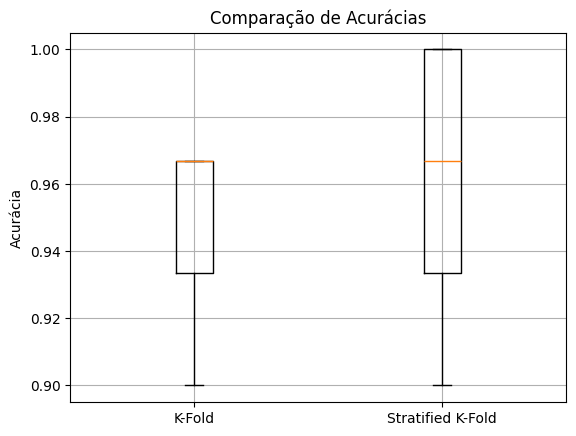

In [14]:
import matplotlib.pyplot as plt

# Comparação de Acurácias
plt.boxplot([scores, stratified_scores], labels=["K-Fold", "Stratified K-Fold"])
plt.title("Comparação de Acurácias")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()